# 1.0 Project Goal

This project implements 2 of the 6 stock trading algorithm dicussed in the [Become a Day Trader Course by Investopedia](https://academy.investopedia.com/products/become-a-day-trader)

The project consists of two parts: 
- First a python file that simulates trading Apple's stock during March 10, 2020 to April 3, 2020 using the trading algorithms from Investopedia's course
- Second is this Jupyter Notebook that describes the methodology behind the trading bot, result of trading from previous step and future improvement

# 2.0 Project Inspiration

This project was inspired by the stock market crash of March 2020 and intended to be used as a comprehensive system to trade stocks and make money.

The bulls or people confident in the market lost a lot of money in March 2020 crash. However, the bears or the people betting against the market made a fortune. Within a few weeks, the market started its uptrend again and reached an all-time high within few months from nearly 50% down.  The rapid decline and rise in the market provided a tremendous opportunity for profit and served as a very inspirational moment. Instead of making money only once, depending on whether I was a bull or bear, I wanted to make money all the time. 

Trading stocks is a losing game for most people: 90% of traders lose money, and only 10% make money consistently. From my research and experience in the stock market, some of the best predictors for success in trading are managing emotions, processing information quickly to see patterns before others, and executing fast. Thus, I embarked on a journey to create a trading bot that would be able to do all of this better than I ever could. 

This project looks at a relatively simple trading bot that will serve as the building block of a comprehensive trading system. This bot uses two out of 6 algorithms from Investopedia's day trading course. The other four algorithms were not precise, and I wanted a working bot released as quickly as possible for testing and optimization purposes. The bot trades Apple's stock only and also operates under an ideal condition, which simplified the buying and selling process of stocks. With all that said, let's see how the trading bot does with an initial balance of USD 10,000

# 3.0 Background into Stock Market and Day Trading

## 3.1 Investing vs. Day Trading and Short vs. Long Position

When buying a particular stock, knowledgable investors typically use a combination of the company's fundamentals, stock's price chart, and related news to determine whether to go long on a stock or short it.

When an investor is confident that stock's price will increase, he buys the stock and profits when the stock's price rises. In trading terminologies, this is going on long on a stock. On the other hand, if an investor expects a stock's price to go down, he would short the stock. Shorting a stock means that he loans shares and sells it in the open market with the hope that he can buy and return the shares back to the owner at a lower price. There are other securities that traders can trade which are out of scope for this project.

A trader typically holds a stock for a much shorter period than an investor. A day trader would close off his positions at the end of the business day. The rationale behind this is to help him mentally check out and start fresh the following day. Also, a day trader only looks at the stock's price chart to make trading decisions.  This trading bot day trades. So all of the positions are closed at the end of the day, and only the stock's price chart is used to make trading decisions.


## 3.2 Different Type of Orders

For simplification, the different types of orders when buying stocks using a broker will be explained from the perspective of an investor intending to go long on a stock.

When buying shares, the buyer can specify a market order or limit order. A market order will instruct the broker's bot to purchase shares at the best current price; this price is usually very close or the same as the current stock's price shown by the broker. For a limit order, the buyer specifies what price he wishes to buy a specific number of shares; this price is called the limit price and is usually lower than the current stock's price.

When selling shares, the buyer can specify a market order, limit order, or stop-loss order. Just like with buying shares, a market order will instruct the broker's bot to sell the specified number of shares asap at the best possible price. For a limit order, the buyer specifies what price he wishes to sell a specific number of shares; this price is called the limit price, and this price is typically equal to or above the stock's current price. For a stop-loss order, the seller specifies the stop-loss price which if the stock price hits, the bots are to sell a specified number of shares automatically at the limit price or higher; the limit price and stop-loss price could be the same; both are usually below the current stock price.

For shorting a stock, buying would imply loaning shares and selling on the market, and selling would mean buying shares back from the open market to return to the owner. All the trade algorithms here utilizes market order when buying.  For every purchase order, two other orders are specified for selling the position. The first order for selling is a limit sell order, and the second order is a stop-loss order. A profitable trade would be closed by a limit sell, and unprofitable trade would be closed by a stop-loss sell. For going long on a stock, the limit price for selling would be set higher than the purchase price, and the stop-loss price for selling would be set lower than the purchase price. For shorting a stock, the limit price for selling would be set lower than the purchase price, and the stop-loss price for selling would be set higher than the purchase price.


## 3.3 Explanation of Derived Numbers and Their Purpose

The following numbers are calculated from stock's data: SMA, EMA, RSI

SMA stands for simple moving average. When calculating SMA, the time unit and time interval need to be specified. For example, calculating SMA for a period of 9 and a time unit of minutes would involve taking the closing price of a stock for the last 9 minutes and taking the average. SMA9 could denote this average for short. EMA stands for exponential moving average. The idea to calculate EMA is similar to that of SMA, but EMA gives more weight to recent data, unlike SMA, which gives equal weight to all the data. The bot utilizes EMA and SMA over 9, 15, 65, and 200-minute intervals are designated by SMA9, SMA15, SMA65, SMA200 or EMA9, EMA15, EMA65, EMA200

RSI stands for relative strength index. Mathematically, RSI looks at average gain vs. average loss over a specific period; 14 minutes in this case. RSI ranges from 0 to 100. RSI of 30 or below indicates that the stock is oversold while RSI of 70 or above shows an overbought condition. RSI should not be used on its own to sell or buy stocks as stocks can stay overbought or oversold for a long time.

The use of these derived numbers will be explained below when discussing the trading algorithms

# 4.0 Trading Algorithms Theory

The two trading algorithms the bot uses are Base Trade Algorithm and Far From Moving Average Trade Algorithm. The specific implementation of the trades can be studied from the code included in the repository. The basic theory of the algorithms are described below

## 4.1 Base Trade Algorithm

The base trade algorithm first ensures that a stock is in a "Base"; the stock's price should appear virtually flat for a minimum of 30 minutes. More specifically, the price should fluctuate no more than 0.5% of the stock's price. As soon as the stock's price moves out of the 0.5% range in either direction, place a market order for going long or short. The stop loss price is equal to the lowest/highest price during the base. Depending on the stock's price, the limit sell price is specified to reach a profit target of \\$0.25-\\$1 per share.

## 4.2 Far From Moving Average Trade Algorithm

Far from moving average trade algorithm first ensures that the stock has diverted more than $1.50 from the closest EMA and RSI is <=20 or >=80. When the stock's price starts to break its upward or downward spiral, place a market order for going short or long. The stop-loss order is placed on the lowest/highest point of the spiral, and the limit sell order should be specified to reach a target of no more than \\$1 profit per share.

# 5.0 Methodology


## 5.1 Obtaining Data and Simulating Real-Time Trading

All the stock's price data is obtained as a table (really a DataFrame) using the [Yahoo Finance python package](https://pypi.org/project/yahoo-finance). Yahoo Finance python package gives historical data of a stock's price over a different period; I chose to use 1 minute period. 

The following table illustrates the format of the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
test_data = yf.download (tickers = "AAPL", start= "2020-09-02", end = "2020-09-03", interval= "1m")
test_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-09-02 09:30:00-04:00,137.589996,137.979996,136.000000,136.059998,136.059998,11490492
2020-09-02 09:31:00-04:00,136.070007,136.619995,134.350006,134.885605,134.885605,4805439
2020-09-02 09:32:00-04:00,134.886703,135.030304,133.500000,134.689804,134.689804,3157176
2020-09-02 09:33:00-04:00,134.679993,135.300003,134.389999,135.179993,135.179993,1646789
2020-09-02 09:34:00-04:00,135.190002,135.449997,135.029999,135.274597,135.274597,1609374


Note that for the purpose of the trading bot, data for the stock is shown at 1 minute interval

Datetime contains both date and time. The time part is formatted as *Current Time: 00-04:00*. 00-04:00 is 4 PM, which is when the North American stock market usually closes. 

Each row tells us what happened during a minute. For example, the first row is saying that between 9:30:00 AM to 9:30:59 AM, the stock's opening price was \\$137.59 (Open' column). During this minute, the stock's price reached a high of \\$137.98 ('High) and reached a low of \\$136 ('Low' Column). The stock's price at the end of the 30th minute of the day was \\$136:06 ('Close). During this minute, 11490492 shares changed hands ('Volume' column). Adj Close or Adjusted Close Price can be interpreted similarly to Closing price; it also factors in dividends, stock splits, new stock offerings. Usually 'Adj Close' and 'Close' price is the same

Yahoo finance package does not give real-time data. It only provides historical price data. So, price data for April 16, 2020, can't be obtained until the end of April 16, 2020. In real-life, a bot could get live data minute by minute by calling the broker's API. To simulate this, this bot instead only receives one minute of data for each iteration of a central loop that encompasses the entire software. So, for a given day, in the first iteration of the loop, the bot would only have access to stock's price data to the end of 9:30 AM (market opens at 9:30 AM in North America). In the second iteration, the bot would have access to data until the end of 9:31 AM, and so on.

Later on, DataFrame containing data similar to the data shown above, along with derived numbers such as SMA, EMA, and RSI, are used to aid in making trading decisions.

## 5.2 Constraints, Assumptions, and Overall Trading Process

Here are initial conditions, constraints, and assumptions under which the bot operates
- The starting capital is USD 10,000
- The bot only trades Apple Stock (Ticker: AAPL)
- The bot can only make one trade at a time
- The maximum loss for a day is $100. 
- If both Base Trade Algorithm and Far From Moving Average trade signals are active at any minute, then base trade is given priority. This choice was made because the base trade algorithm theory is much more precise than the far from moving average trade algorithm
- No trades are placed after 3:30 PM, and all the trades are closed by 3:50 PM. These limits are there to allow a trade setup to play out (the last possible trade in a day have 20 minutes to play out) and ensure that all positions are closed by the end of the day


The overall program is executed as followed by the bot:
1. Append one row of data to the DataFrame containing the stock's price data
2. Calculate derived numbers (SMA, EMA, RSI) including the latest data
3. Check if the base trade algorithm and or far from moving average generated a trading signal. 
4. Check if there is an active trade. If there is an active trade, then check if the positions should be closed based on stop-loss price and limit sell price
5. Act on the trading signal from Step 3 if the following conditions are satisfied:
    - No active trade
    - Current time is 3:30 PM or earlier
    - Maximum loss for the day won't be reached if the trade does not play out in our favor
    
As noted before, all buy orders are market order, and for every purchase order, two sell orders: limit sell and stop-loss sell are also issued.

6.	Repeat Step 1-5


As stated before, when acting on a trading signal, the bot gives priority to base trade signals over far from moving average trade signals. During buying, the bot records buying time, buying price, and the number of shares. In each trade, all available capital is used to purchase shares. The broker fee is assumed to be $1 during selling or buying as per
[Interactive Brokers website](https://www.interactivebrokers.ca/en/index.php?f=45251&p=stocks1)

The selling time of a position and profit/loss is also recorded in the appropriate row in the trade summary table

A stock's price is generally continuous. In real life, it seems that the stock's price is updated every second. However, the bot only has access to minute by minute data. Thus, at step 4, if there is an active trade and the bot detects that as per the latest data obtained in Step 1, the stock's price crossed either of the price threshold established by the limit and stop-loss sell, then it is assumed that the bot sold the position at the limit sell or stop-loss price. 

As an example, the bot receives data up to the end of 1:30 PM at 1:31 PM.  With the help of the algorithms, the bot purchases the stock at 1:31 PM at \\$273.75 per share. The limit sell price is set at \\$274 per share.  Within thirty seconds, the stock's price reached the price target of \\$274 per share. At 1:32 PM, the bot receives data up to the end of 1:31 PM. The bot sees that the stock's price closed at \\$275 at the end of 1:31 PM. Thus, we can assume that the broker's bot sold the shares at \\$274 per share due to the continuity assumption, and we achieved our profit target. This is a simplification of the selling process as alluded to before.

# 6.0 Result Analysis from the Trading Bot

This section will analyze the data outputted by the trading bot as it simulated trading Apple's stock during March 10, 2020 to April 3, 2020

The goal of the analysis will be first to see if the trading bot is profitable and second if can figure out some scenarios which are more profitable than others

In [3]:
import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt

This DataFrame is similar to DataFrame that is retrieved directly from Yahoo Finance. The DataFrame also contains the derived numbers: SMA, EMA, RSI, all of which have been described before. This modified DataFrame is used by the bot to store and retrieve the derived numbers.

# 6.1 Analysis of Profit and Loss Summary by Days

In [4]:
ending_balance = pd.read_csv('BalanceChange30Days.csv', index_col = 0)
ending_balance

,Date,EndingBalance
1,2020-03-10,10035.750000
2,2020-03-11,10017.750000
3,2020-03-12,9950.520477
4,2020-03-13,9950.520477
5,2020-03-16,9960.270477
6,2020-03-17,9960.270477
7,2020-03-18,9950.270477
8,2020-03-19,9960.020477
9,2020-03-20,9959.770477
10,2020-03-23,9971.020477


This DataFrame shows the ending balance at the end of each day. The starting balance was USD 10,000 as stated before.

At the end of 19 business days, the trading bot lost about \\$76.74. The result is a bit disappointing to see, especially considering that just two days before the end of the test run, it made a total profit of about \\$56.76. 

Let's dive deeper into the losing and winning days. Some minor cleanup on the data is done in the process

In [5]:
#reset index so starting index is 0
ending_balance.index = list(range(ending_balance.shape[0]))

In [6]:
#Add in starting balance column for each day
ending_balance['StartingBalance'] = pd.Series()
ending_balance['StartingBalance'][1:] = ending_balance['EndingBalance'][:-1]
ending_balance.loc[0,'StartingBalance']= 10000 #First starting balance is 10,000

#Calculate profit for each day
ending_balance['Profit_Loss'] = ending_balance['EndingBalance'] - ending_balance['StartingBalance'] 

#label the ending and losing day to see distributoin of losses/profit for losing and winning days
ending_balance['Profit_Loss_Label'] = pd.Series()
ending_balance.loc [ending_balance['Profit_Loss']>=0, 'Profit_Loss_Label'] = 'Profit'
ending_balance.loc [ending_balance['Profit_Loss']<0, 'Profit_Loss_Label'] = 'Loss'

#Round off dollar amount to two decimal point
for column in ['EndingBalance', 'StartingBalance', 'Profit_Loss']:
    ending_balance[column] = ending_balance[column].round(2)
    

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
ending_balance.head()

,Date,EndingBalance,StartingBalance,Profit_Loss,Profit_Loss_Label
0,2020-03-10,10035.75,10000.00,35.75,Profit
1,2020-03-11,10017.75,10035.75,-18.00,Loss
2,2020-03-12,9950.52,10017.75,-67.23,Loss
3,2020-03-13,9950.52,9950.52,0.00,Profit
4,2020-03-16,9960.27,9950.52,9.75,Profit


In [8]:
#Days when the bot broke even is counted as a winning day
num_winning_days = (ending_balance['Profit_Loss']>=0).sum()
num_losing_days = (ending_balance['Profit_Loss']<0).sum()

print('Number of winning days are: {}'.format(num_winning_days))
print('Number of losing days are: {}'.format(num_losing_days))

Number of winning days are: 11
Number of losing days are: 8


In [9]:
#Create a temporary ending_balance DataFrame copy so we can use absolute value for losses/profit 
#This will make comparison easier
temp_ending_balance = ending_balance.copy()
temp_ending_balance['Profit_Loss'] = temp_ending_balance['Profit_Loss'].abs()

Text(0.5, 1.0, 'Distribution of Profits and Losses by Days')

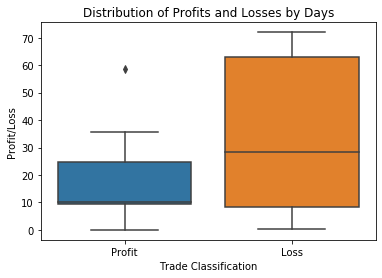

In [10]:
sb.boxplot(x = 'Profit_Loss_Label', y = 'Profit_Loss', data = temp_ending_balance)
plt.xlabel('Trade Classification')
plt.ylabel('Profit/Loss')
plt.title('Distribution of Profits and Losses by Days')

In [11]:
#Statistics for winning days
temp_ending_balance[temp_ending_balance['Profit_Loss_Label']=='Profit'].describe()['Profit_Loss']

count    11.000000
mean     17.659091
std      17.473291
min       0.000000
25%       9.500000
50%      10.250000
75%      24.875000
max      58.500000
Name: Profit_Loss, dtype: float64

In [12]:
#Statistics for losing days
temp_ending_balance[temp_ending_balance['Profit_Loss_Label']=='Loss'].describe()['Profit_Loss']

count     8.000000
mean     33.873750
std      29.863805
min       0.250000
25%       8.315000
50%      28.375000
75%      62.932500
max      72.000000
Name: Profit_Loss, dtype: float64

On average, the bot seems to be good at breaking even or making a profit since it broke even or made money in 11 days and lost money in 8 days.

The box and whisker illustrate that during winning days, the profit is in a much narrower range compared to losses in losing days. The percentiles printed here confirms this: 50% of the time, the bot makes \\$10.25 or less during the winning days,  and 50% of the time, the bot losses \\$28.375 or less during losing days


In [13]:
ending_balance[ending_balance['Profit_Loss']<0]

,Date,EndingBalance,StartingBalance,Profit_Loss,Profit_Loss_Label
1,2020-03-11,10017.75,10035.75,-18.00,Loss
2,2020-03-12,9950.52,10017.75,-67.23,Loss
6,2020-03-18,9950.27,9960.27,-10.00,Loss
8,2020-03-20,9959.77,9960.02,-0.25,Loss
11,2020-03-25,9988.26,9991.52,-3.26,Loss
14,2020-03-30,10037.26,10076.01,-38.75,Loss
17,2020-04-02,9995.26,10056.76,-61.50,Loss
18,2020-04-03,9923.26,9995.26,-72.00,Loss


Looking at the losing days further, we indeed see that only four days made up the overwhelming amount of lossesSo there is a chance that in the future, some common factor could be found amongst those days to help the bot perform better

Traders typically seem to love volatility as they can play either side of the market and profit. Thus, let's next check if the price range of the stock on a particular day and standard deviation affected profit or losses

In [14]:
stock_data = pd.read_csv('StockData30Days.csv')
#Calculate stock's max range and standard deviation for each day and append to ending balance dataframe
ending_balance['MaxPriceRange'] = pd.Series()
ending_balance['StandardDeviation'] = pd.Series()

for date in stock_data['DateOnly'].unique():
    
    #Obtain max range and standar deviation by slicing stock dataframe by dates
    one_date_data = stock_data.loc[stock_data['DateOnly'] == date,:] 
    max_range = one_date_data['Close'].max() - one_date_data['Close'].min()
    std_dev = one_date_data['Close'].std()
    
    #Append max range and standard deviation to Ending Balance Dataframe
    ending_balance.loc[ending_balance['Date'] == date,'MaxPriceRange'] = max_range
    ending_balance.loc[ending_balance['Date'] == date,'StandardDeviation'] = std_dev

In [15]:
ending_balance.head()

,Date,EndingBalance,StartingBalance,Profit_Loss,Profit_Loss_Label,MaxPriceRange,StandardDeviation
0,2020-03-10,10035.75,10000.00,35.75,Profit,16.119995,2.840412
1,2020-03-11,10017.75,10035.75,-18.00,Loss,8.620026,1.451985
2,2020-03-12,9950.52,10017.75,-67.23,Loss,21.898102,3.426171
3,2020-03-13,9950.52,9950.52,0.00,Profit,24.955002,3.100964
4,2020-03-16,9960.27,9950.52,9.75,Profit,18.625000,3.238043


Text(0.5, 1.0, 'Maximum Price Range vs. Profit/Loss in a Day')

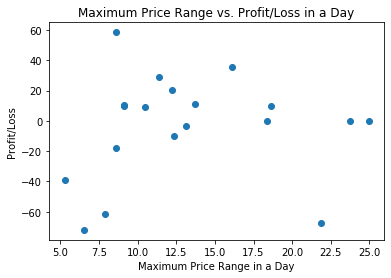

In [16]:
plt.scatter(data = ending_balance, x = 'MaxPriceRange', y = 'Profit_Loss')
plt.xlabel('Maximum Price Range in a Day')
plt.ylabel('Profit/Loss')
plt.title('Maximum Price Range vs. Profit/Loss in a Day')

Text(0.5, 1.0, 'Standard Deviation in Price vs. Profit/Loss in a Day')

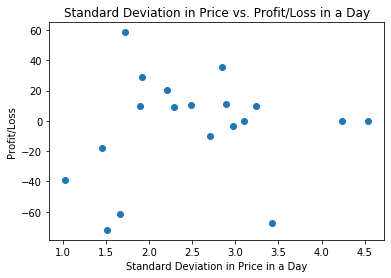

In [17]:
plt.scatter(data = ending_balance, x = 'StandardDeviation', y = 'Profit_Loss')
plt.xlabel('Standard Deviation in Price in a Day')
plt.ylabel('Profit/Loss')
plt.title('Standard Deviation in Price vs. Profit/Loss in a Day')

From the scatter plot, it does not seem that there is any relationship between profit to either maximum range or standard deviation

In [18]:
ending_balance[['Profit_Loss', 'MaxPriceRange', 'StandardDeviation']].corr()

,Profit_Loss,MaxPriceRange,StandardDeviation
Profit_Loss,1.000000,0.092819,0.140759
MaxPriceRange,0.092819,1.000000,0.873758
StandardDeviation,0.140759,0.873758,1.000000


The correlation matrix further proves the lack of any strong relationship between Profit_Loss to either of MaxPriceRange and StandardDeviation; Profit_Loss and MaxPriceRange have a correlation of 0.092819, Profit_Loss and StandardDeviation have a correlation of 0.140759. This is not a surprise considering the trade algorithms in their core don't uitlize volatility at all.

It makes sense that MaxPriceRange and StandardDeviation have a strong correlation as a higher max range would typically correspond to a higher standard deviation.

# 6.2 Analysis of All Executed Trades

In [19]:
all_trade_summary = pd.read_csv('AllTradeSummary30Days.csv')
all_trade_summary.head()

,Unnamed: 0,CurrentDay,TradeType,TradeStatus,TradeId,BuyPrice,LimitSellPrice,StopLossPrice,NumShares,Profit,IsTradeComplete,SoldTime
0,107,2020-03-10,BaseTrade,Short,77,274.580109,274.330109,274.830109,36,9.00,Yes,11:18:00
1,226,2020-03-10,BaseTrade,Long,196,277.831696,278.081696,277.581696,36,9.00,Yes,13:18:00
2,247,2020-03-10,BaseTrade,Short,217,275.734802,275.484802,275.984802,36,9.00,Yes,13:40:00
3,348,2020-03-10,BaseTrade,Long,318,280.589996,280.839996,280.339996,35,8.75,Yes,15:20:00
4,91,2020-03-11,BaseTrade,Long,61,276.980011,277.230011,276.730011,36,-9.00,Yes,11:03:00


In [20]:
#Minor Cleanup
#Unnamed:0 is the buy time index
new_column_titles = list(all_trade_summary.columns)
new_column_titles[0] = 'BuyTimeMinute'
all_trade_summary.columns = new_column_titles

In [21]:
all_trade_summary.head()

,BuyTimeMinute,CurrentDay,TradeType,TradeStatus,TradeId,BuyPrice,LimitSellPrice,StopLossPrice,NumShares,Profit,IsTradeComplete,SoldTime
0,107,2020-03-10,BaseTrade,Short,77,274.580109,274.330109,274.830109,36,9.00,Yes,11:18:00
1,226,2020-03-10,BaseTrade,Long,196,277.831696,278.081696,277.581696,36,9.00,Yes,13:18:00
2,247,2020-03-10,BaseTrade,Short,217,275.734802,275.484802,275.984802,36,9.00,Yes,13:40:00
3,348,2020-03-10,BaseTrade,Long,318,280.589996,280.839996,280.339996,35,8.75,Yes,15:20:00
4,91,2020-03-11,BaseTrade,Long,61,276.980011,277.230011,276.730011,36,-9.00,Yes,11:03:00


Explanation of Columns

- **BuyTimeMinute**: BuyTimeMinute indicates the Buy Time by calculating the difference between the buy time and starting time of the day (9:30 AM) in minutes.  For example, 9:55 AM would have a BuyTimeMinute of 25. Encoding trade time this way helped to keep track of trade and could help in using machine learning algorithms in future versions of this bot.

- **CurrentDay**: The day when the trade was executed

- **TradeType**: Indicates the type of trade. The choices are either the base trade or far from moving average trade

- **TradeStatus**: Indicates whether we went long on a stock or shorted the stock for a particular trade

- **BuyPrice**: The price the shares were bought for shorting or going long

- **LimitSellPrice**: The price at which the trading position was closed at if the trade was profitable

- **StopLossPrice**: The price at which the trading position was closed at if the trade was unprofitable

- **NumShares**: The number of shares for the specific trading position

- **IsTradeComplete**: This column was used to keep track of active trade. It only contains "Yes" as all the trades were completed as per the constraints set on the bot

- **SoldTime**: The time when the trading position was closed

- **Profit**: Profit for the current trade

We will first look at winning and losing trades on their own

We will then look at winning and losing trade by TradeType, then by TradeStatus

We will finally look at whether the buy time for a trade affects the profitability of a trade or not

In [22]:
num_winning_trades = (all_trade_summary['Profit']>0).sum()
num_losing_trades = (all_trade_summary['Profit']<0).sum()

print('Total number of trades made are: {}'.format(all_trade_summary.shape[0]))
print('Number of winning trades are: {}'.format(num_winning_trades))
print('Number of losing trades are: {}'.format(num_losing_trades))

Total number of trades made are: 186
Number of winning trades are: 93
Number of losing trades are: 93


In [23]:
#Creating labels for box and whisker plot
all_trade_summary['Profit_Loss_Label'] = pd.Series()
all_trade_summary.loc [all_trade_summary['Profit']>0, 'Profit_Loss_Label'] = 'Profit'
all_trade_summary.loc [all_trade_summary['Profit']<0, 'Profit_Loss_Label'] = 'Loss'

In [24]:
all_trade_summary.head()

,BuyTimeMinute,CurrentDay,TradeType,TradeStatus,TradeId,BuyPrice,LimitSellPrice,StopLossPrice,NumShares,Profit,IsTradeComplete,SoldTime,Profit_Loss_Label
0,107,2020-03-10,BaseTrade,Short,77,274.580109,274.330109,274.830109,36,9.00,Yes,11:18:00,Profit
1,226,2020-03-10,BaseTrade,Long,196,277.831696,278.081696,277.581696,36,9.00,Yes,13:18:00,Profit
2,247,2020-03-10,BaseTrade,Short,217,275.734802,275.484802,275.984802,36,9.00,Yes,13:40:00,Profit
3,348,2020-03-10,BaseTrade,Long,318,280.589996,280.839996,280.339996,35,8.75,Yes,15:20:00,Profit
4,91,2020-03-11,BaseTrade,Long,61,276.980011,277.230011,276.730011,36,-9.00,Yes,11:03:00,Loss


Text(0.5, 1.0, 'Distribution of Profits and Losses by Trade')

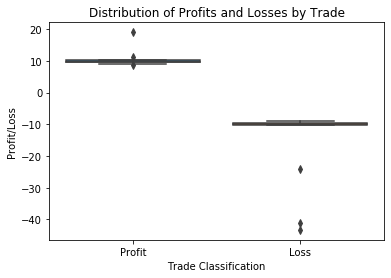

In [25]:
sb.boxplot(x = 'Profit_Loss_Label', y = 'Profit', data = all_trade_summary)
plt.xlabel('Trade Classification')
plt.ylabel('Profit/Loss')
plt.title('Distribution of Profits and Losses by Trade')

In [26]:
all_trade_summary.loc [all_trade_summary['Profit']>0, 'Profit'].describe()

count    93.000000
mean      9.938172
std       1.034497
min       8.750000
25%       9.750000
50%       9.750000
75%      10.250000
max      19.000000
Name: Profit, dtype: float64

In [27]:
all_trade_summary.loc [all_trade_summary['Profit']<0, 'Profit'].describe()

count    93.000000
mean    -10.763350
std       4.915503
min     -43.290497
25%     -10.250000
50%     -10.000000
75%      -9.750000
max      -9.000000
Name: Profit, dtype: float64

In [28]:
all_trade_summary['TradeType'].value_counts()

BaseTrade                    182
FarFromMovingAverageTrade      4
Name: TradeType, dtype: int64

It is not surprising that both winning and losing trade cluster around a similar area. As seen above, most of the trades were base trade, and in the implementation of the base trade algorithm, both stop loss and limit sell were set at $0.25 per share. The outliers for both losses and profit are likely to be from far from moving average trade

In [29]:
all_trade_summary[all_trade_summary['Profit'].abs()>15]

,BuyTimeMinute,CurrentDay,TradeType,TradeStatus,TradeId,BuyPrice,LimitSellPrice,StopLossPrice,NumShares,Profit,IsTradeComplete,SoldTime,Profit_Loss_Label
18,1,2020-03-12,FarFromMovingAverageTrade,Long,1,257.269989,257.769989,256.640015,38,-23.939026,Yes,09:33:00,Loss
19,200,2020-03-12,FarFromMovingAverageTrade,Short,200,267.309998,266.809998,268.480011,37,-43.290497,Yes,13:05:00,Loss
48,2,2020-03-25,FarFromMovingAverageTrade,Short,2,253.240005,252.740005,254.291595,39,-41.012009,Yes,09:33:00,Loss
49,10,2020-03-25,FarFromMovingAverageTrade,Short,10,257.019989,256.519989,257.829987,38,19.000000,Yes,09:41:00,Profit


And as shown here, the outliers in losses and gains (mostly losses) were all from far from moving average trade. As a natural next step, let's take a look at profit breakdown by TradeType

In [30]:
all_trade_summary.groupby('TradeType').agg(np.sum)['Profit']

TradeType
BaseTrade                    12.500000
FarFromMovingAverageTrade   -89.241531
Name: Profit, dtype: float64

Above, we have a summary of net profit by trade type. The base trade algorithm returned a profit of $12.50 while far from moving average trade algorithm lost a net \\$89.24

As suspected, far from moving average algorithm caused more harm than good. Let's see next if shorting was more profitable or going long was more profitable

In [31]:
all_trade_summary.groupby('TradeStatus').agg(np.sum)['Profit']

TradeStatus
Long    -82.939026
Short     6.197495
Name: Profit, dtype: float64

In terms of going long on a stock or shorting a stock, it definitely seems more profitable to short a stock

In [32]:
all_trade_summary.groupby(['TradeType','TradeStatus']).agg(np.sum)['Profit']

TradeType                  TradeStatus
BaseTrade                  Long          -59.000000
                           Short          71.500000
FarFromMovingAverageTrade  Long          -23.939026
                           Short         -65.302505
Name: Profit, dtype: float64

The most profitable strategy seems to be only executing on short trade signals for base trade algorithm. If the bot only acted on this signal, then it would be reasonably profitable over 19 business days. It would return about 0.715% over a month, which annualizes to about 8.92% over a year. 8.92% annual return would beat most hedge funds. However, this data is only for over a month, so the comparison is not valid.

Let's see if a particular buying time of the trade has any significant impact on profit or loss on trades

Text(0.5, 1.0, 'Distribution of Profits and Losses by Trade and Buy Time')

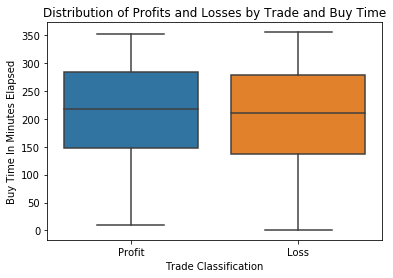

In [33]:
sb.boxplot(x = 'Profit_Loss_Label', y = 'BuyTimeMinute', data = all_trade_summary)
plt.xlabel('Trade Classification')
plt.ylabel('Buy Time In Minutes Elapsed')
plt.title('Distribution of Profits and Losses by Trade and Buy Time')

Visually, we can see that buy time distribution of both winning and losing trades are roughly the same. 

So it is unlikely that the time of the day when a stock is bought affects the profit/loss on a a particular trade

## 6.3 Base Trade Summary Analysis

In [34]:
base_trade_summary = pd.read_csv('BaseTradeSummary30Days.csv', index_col = 0)
far_moving_average_trade_summary = pd.read_csv('FarFromMovingAverageTradeSummary30Days.csv', index_col = 0)
base_trade_summary.head()

,Date,StartTime,EndTime,StartTimeIndex,EndTimeIndex,MaxDifStockPrice,MinDifStockPrice,MaxDif,MinDif,MaxDifAbs,MaxDifTime,MinDiftime,TradeSignal,BuyTime,BuyTimeIndex,BuyPrice,StopLossPrice,LimitSellPrice,ExecutedOnSignal
0,2020-03-10,09:30:00,09:59:00,0,29,279.809998,275.309998,1.750000,-2.750000,2.750000,09:58:00,09:40:00,Nothing,Nothing,NaN,NaN,NaN,NaN,Nothing
1,2020-03-10,09:31:00,10:00:00,1,30,279.809998,275.309998,2.429993,-2.070007,2.429993,09:58:00,09:40:00,Nothing,Nothing,NaN,NaN,NaN,NaN,Nothing
2,2020-03-10,09:32:00,10:01:00,2,31,279.809998,275.309998,2.049988,-2.450012,2.450012,09:58:00,09:40:00,Nothing,Nothing,NaN,NaN,NaN,NaN,Nothing
3,2020-03-10,09:33:00,10:02:00,3,32,280.110107,275.309998,1.675110,-3.125000,3.125000,10:02:00,09:40:00,Nothing,Nothing,NaN,NaN,NaN,NaN,Nothing
4,2020-03-10,09:34:00,10:03:00,4,33,280.350006,275.309998,1.389099,-3.650909,3.650909,10:03:00,09:40:00,Nothing,Nothing,NaN,NaN,NaN,NaN,Nothing


This DataFrame primary contains data of every 30-minute interval along with the stock's price range, the max/min stock's price during a 30-minute interval and their corresponding time, and so on

StartTimeIndex and EndTimeIndex are the numbers of minutes passed since the market opened (9:30 AM). The difference between StarTimeIndex and EndTimeIndex is always 30 minutes because we are using each 30-minute block of time to check if the stock is in a base.

The particular column of interest is TradeSignal and ExecutedOnSignal

In [35]:
base_trade_summary['TradeSignal'].unique()

array(['Nothing', 'Base', 'Short', 'Long'], dtype=object)

The TradeSignal column contains four values, as shown above
- Nothing implies that the stock was not in a base during the 30-minute interval
- Base means that the stock was in a base but did not break the base in the 31st minute
- Long/Short implies that the stock was in a base and did break the base in the upward or downward direction

In [36]:
base_trade_summary['ExecutedOnSignal'].unique()

array(['Nothing', 'Yes', 'No'], dtype=object)

The ExecutedOnSignal contains three values as shown above
-	Nothing implies that there was no base trading signal. Thus there was no question of the bot acting on a signal
-	Yes means that there was a base trade signal, and the bot acted on the signal
-	No implies that there was a base trade signal and the bot did not act on it

Since it was established that base trade and shorting a stock is likely the most profitable trade, let's see how many of those signal, the bot did not act on

In [37]:
base_trade_summary['ExecutedOnSignal'].value_counts()

Nothing    6497
Yes         182
No           86
Name: ExecutedOnSignal, dtype: int64

In [38]:
#Bit of processing to show summarized data by ExecutedOnSignal and TradeSignal
grouped_executed_tradeSignal = base_trade_summary.groupby(['ExecutedOnSignal', 'TradeSignal']).agg({'Date':'count'})
grouped_executed_tradeSignal.columns = ['count']
grouped_executed_tradeSignal.reset_index(inplace = True)

In [39]:
grouped_executed_tradeSignal

,ExecutedOnSignal,TradeSignal,count
0,No,Long,44
1,No,Short,42
2,Nothing,Base,1097
3,Nothing,Nothing,5400
4,Yes,Long,87
5,Yes,Short,95


About equal number of trade signal was ignored by the bot for both long and short trade signal

In [40]:
base_trade_summary[base_trade_summary['ExecutedOnSignal'] == 'No']['EndTimeIndex'].max()

383

Recall that the bot was constrained to not trade after 3:30 PM. 3:30 PM would correspond to a TimeIndex of 390 (implying 390 minutes passed since 9:30 AM). Since 383<390, no base trade signal was rejected due to time constraints on the bot. There were only four far from moving average trade executed over 19 days compared to 182 base trade. So active base trade and or maximum profit loss constraint likely caused the bot to ignore the trade signal.

## 6.4 Far From Moving Average Trade Summary Analysis

In [41]:
far_moving_average_trade_summary.head()

,CurrentDate,LastPrice,CurrentPrice,CurrentRsi,ClosestEmaPrice,DiffFromClosestEma,TradeSignal,BuyPrice,LimitSellPrice,StopLossPrice,ExecutedOnSignal
1,2020-03-10,278.059998,277.380005,63.577685,272.404219,5.655778,Nothing,NaN,NaN,NaN,Nothing
2,2020-03-10,277.380005,277.760010,64.260264,273.475378,3.904627,Nothing,NaN,NaN,NaN,Nothing
3,2020-03-10,277.760010,278.434998,65.497156,274.467302,3.292708,Nothing,NaN,NaN,NaN,Nothing
4,2020-03-10,278.434998,278.960907,66.470807,275.366023,3.068975,Nothing,NaN,NaN,NaN,Nothing
5,2020-03-10,278.960907,277.248993,60.487143,275.742617,3.218290,Nothing,NaN,NaN,NaN,Nothing


This DataFrame contains a summary of result outputted by the bot for every minute the market was open from March 10, 2020, to April 3, 2020

Only analysis for 9:30 AM is excluded as the far from moving average trade algorithm needs at least one previous minute of data to see if the stock price trend is breaking. I did not want to use the previous day's data at 4 PM as the last price as lots of trading happens after hours, which's data is not available from Yahoo Finance. Thus, using 9:30 AM data as the starting point of the trading algorithm made more sense.

The indices here range from 1 to 389 for each day and then repeated for a new day. The row indices are Time Index or how many minutes have passed since 9:30 AM. The rest of the columns are self-explanatory based on the discussion so far, and thus not explained further.

In [42]:
far_moving_average_trade_summary['ExecutedOnSignal'].unique()

array(['Nothing', 'Yes'], dtype=object)

So bot executed on every trade signal generated by the far from moving average trade signal

In [43]:
far_moving_average_trade_summary.loc[far_moving_average_trade_summary['ExecutedOnSignal'] == 'Yes',:]

,CurrentDate,LastPrice,CurrentPrice,CurrentRsi,ClosestEmaPrice,DiffFromClosestEma,TradeSignal,BuyPrice,LimitSellPrice,StopLossPrice,ExecutedOnSignal
1,2020-03-12,256.640015,257.269989,16.043969,269.217919,12.577904,Long,257.269989,257.769989,256.640015,Yes
200,2020-03-12,268.480011,267.309998,82.616273,261.965135,6.514876,Short,267.309998,266.809998,268.480011,Yes
2,2020-03-25,254.291595,253.240005,81.304118,249.297852,4.993743,Short,253.240005,252.740005,254.291595,Yes
10,2020-03-25,257.829987,257.019989,81.000958,255.493175,2.336811,Short,257.019989,256.519989,257.829987,Yes


Only four far from moving average trade was made in a month.  The RSI threshold of 20 and 80 is not easily crossed without an exceptional market environment like in the first and second quarter of 2020; there was a  panic selling followed by massive buying, resulting in a V-shaped recovery. Thus, the few numbers of far from moving average trade make sense.

In [44]:
all_trade_summary[all_trade_summary['TradeType'] == 'FarFromMovingAverageTrade']

,BuyTimeMinute,CurrentDay,TradeType,TradeStatus,TradeId,BuyPrice,LimitSellPrice,StopLossPrice,NumShares,Profit,IsTradeComplete,SoldTime,Profit_Loss_Label
18,1,2020-03-12,FarFromMovingAverageTrade,Long,1,257.269989,257.769989,256.640015,38,-23.939026,Yes,09:33:00,Loss
19,200,2020-03-12,FarFromMovingAverageTrade,Short,200,267.309998,266.809998,268.480011,37,-43.290497,Yes,13:05:00,Loss
48,2,2020-03-25,FarFromMovingAverageTrade,Short,2,253.240005,252.740005,254.291595,39,-41.012009,Yes,09:33:00,Loss
49,10,2020-03-25,FarFromMovingAverageTrade,Short,10,257.019989,256.519989,257.829987,38,19.000000,Yes,09:41:00,Profit


Above is a summary of how the far from moving average trades turned out repeated here for convenience. It does not look like there is much promise with far from moving average algorithm. Maybe, further tuning of the bot can help

# 7.0 Future Goals and Improvement

In terms of more near term improvements, I would like to repeat the same experiment over a couple of years for more conclusive ideas. I would also like to implement a smart stop loss, so the bot does not close a winning trade as soon as it reaches a fixed profit target. It should instead keep the trade alive and implement a rising stop-loss to preserve gains. Experimenting with stop-loss price and limit sell price is another option for a long list of things to test.

The future goals and improvements for this project are massive. I intend to build a comprehensive trading system that utilizes a company’s fundamentals, news, and price chart to make trading decisions. Also, I want the trading system to trade other securities as well, such as options.

Once the infrastructure is up, more focus can be made on testing different trading algorithms on a vast amount of data. The algorithms need to be run on stocks with varying prices, volumes, and exchanges. Also, the market behaves distinctly differently during economic prosperity vs. time of economic downturn and everything else in the middle. Stock’s performances are also affected by long term technological trends, geopolitical environments, and so on. Thus, the scope of testing is enormous. Ideally, the purpose of running all this test would be to calculate the probability of a trade being profitable very precisely. The bot could then only act on the trading signals that are most likely going to result in a profitable trade. All of this infrastructure building will require a massive upgrade in the software architecture with a high degree of focus on speed of analysis so trades can be made on time. After all, there is no point in building a sophisticated system that can predict a profitable trade after the time to execute has passed.

# 8.0 Conclusion

This project looked at the result of a bot trading Apple’s stock (Ticker: AAPL) only for 19 business days with a starting capital of USD 10,000 between March 10, 2020, to April 3, 2020. The bot used the base trade algorithm and the far from moving average trade algorithm to make trading decisions.

At the end of April 3, 2020, the account balance was \\$9923.26, a loss of \\$76.74. The total number of trades made was 186. The number of winning and losing trades was the same (93). However, the bot had more massive losses than gains. Far from moving, average trade lost a net \\$-89.24 while base trade won a net \\$12.50 over the simulation period. The best type of trade was shorting a stock from a base trade signal with a net profit of \\$71.50 over the simulation period.

The analysis looked at a couple of variables to see if they provide any insight between winning and losing days/trades. The buy time of the trade does not predict whether a trade will be profitable or not. The stock’s price range and standard deviation in a given day also do not provide any insight on a day being profitable or not.

Immediate improvements for this project include implementing a smart stop loss and fine-tuning the stop loss and limit sell price based on running the same experiment over long timeframes. The ultimate future goal is to create a comprehensive trading system that uses a company’s fundamentals, news, stock’s price chart, and underlying economic metrics to make trading decisions.

In conclusion, this bot and project will serve as a good building block for a comprehensive trading system, and none of the results can be deemed conclusive because of the small sample size. 